# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 2

### Problem 1a:   
Write a script to convert declination, inclination, intensity data to North, East and Down.  First we need to import numpy, the module with lots of math functions and pandas with nice data manipulation functions

In [1]:
import numpy as np
import pandas as pd


Let's write a little function to do the conversion.  

In [2]:
def dir2cart(data):
    """ Converts data array with [Declination, Inclination, Intensity] 
        to cartesian coordinates, X=North, Y=East, Z=Down
        Returns array with [X,Y,Z]
    """
    # convert degrees to radians for declination and inclination
    decs,incs,ints=np.radians(data[0]),np.radians(data[1]),data[2]
    X=ints*np.cos(decs)*np.cos(incs)
    Y=ints*np.sin(decs)*np.cos(incs)
    Z=ints*np.sin(incs)
    cart=np.array([X,Y,Z]).transpose()
    return cart

Now let's read in a data file with some geomagnetic field vectors in it.

In [3]:
# read in the data and transpose it to rows of dec, inc, int
data=np.loadtxt('Chapter_2/ps2_prob1_data.txt').transpose()
print (dir2cart(data))

[[ 21352.55524831   2093.63634727  23332.08409238]
 [  4504.44337072   -259.7245706   -1225.86288284]
 [ 23546.1300489    3141.72451736  33426.255268  ]
 [ 14629.0911691    1022.96570709  21021.51776849]
 [ 23150.99484809   2965.71083857  30861.24994328]
 [ 14767.09147922   2127.97038951    651.40495181]
 [ 18929.94924879   -231.28446662  25961.37752135]
 [  8342.98700429    759.27129675   8495.26107758]
 [ 10858.76521357   2606.95887762  19818.79867013]
 [ 30243.76260383   1532.08292009  41375.84902637]]


### Problem 1b: 
Get locations from 10 random spots on Earth and calculate the IGRF vectors at each place. 

To solve this problem,  we have to understand how the function **pmag.get_unf( )** works.  To do this, we need to tell the notebook where the **pmag** module lives, import it and print out the doc string for **get_unf()**: 

In [1]:
import pmagpy.pmag as pmag
help(pmag.get_unf)

Help on function get_unf in module pmagpy.pmag:

get_unf(N=100)
    Generates N uniformly distributed directions
    using the way described in Fisher et al. (1987).
    Parameters
    __________
    N : number of directions, default is 100
    
    Returns
    ______
    array of nested dec,inc pairs



Now we can use that function to generate a list of random points on the Earth's surface.  

In [4]:
places=pmag.get_unf(10)
print (places)

[[207.24306956  28.29166733]
 [321.47716808 -29.00124296]
 [158.93872899 -50.61388124]
 [128.9347395  -62.67103462]
 [137.40448359  63.04146583]
 [106.46942863 -53.64820641]
 [ 18.30566173  -1.25124075]
 [134.8651658  -37.24450095]
 [155.80586969  36.04222227]
 [150.13736454  -5.07008073]]


Now let's find out about ipmag.igrf

In [5]:
import pmagpy.ipmag as ipmag
help(ipmag.igrf)

Help on function igrf in module pmagpy.ipmag:

igrf(input_list, mod='', ghfile='')
    Determine Declination, Inclination and Intensity from the IGRF model.
    (http://www.ngdc.noaa.gov/IAGA/vmod/igrf.html)
    
    Parameters
    ----------
    input_list : list with format [Date, Altitude, Latitude, Longitude]
        date must be in decimal year format XXXX.XXXX (Common Era)
    mod :  desired model
        "" : Use the IGRF
        custom : use values supplied in ghfile
        or choose from this list
        ['arch3k','cals3k','pfm9k','hfm10k','cals10k.2','cals10k.1b']
        where:
            arch3k (Korte et al., 2009)
            cals3k (Korte and Constable, 2011)
            cals10k.1b (Korte et al., 2011)
            pfm9k  (Nilsson et al., 2014)
            hfm10k is the hfm.OL1.A1 of Constable et al. (2016)
            cals10k.2 (Constable et al., 2016)
            the first four of these models, are constrained to agree
            with gufm1 (Jackson et al., 2000) for

And now we can ship the **data** in places to **ipmag.igrf**.

In [6]:
for place in places:
    print (ipmag.igrf([2006,0,place[1],place[0]]))

[1.16197289e+01 4.66616315e+01 3.83625918e+04]
[  337.87155554   -45.58682704 23579.17239865]
[ 2.61405396e+01 -7.62885600e+01  6.33913647e+04]
[  289.5735567    -87.77436695 66625.35585467]
[  344.37479044    75.90940682 58756.39721505]
[  310.11691293   -80.54694388 63228.96812028]
[ 3.58479421e+02 -3.04999138e+01  3.30367867e+04]
[ 6.76816076e+00 -6.96071110e+01  6.08392321e+04]
[  357.0514015     47.74820044 42370.43178371]
[ 6.36885345e+00 -2.46038142e+01  4.00089704e+04]


## Problem 1c:  
Take the output from Problem 1b and call **dir2cart**. 

In [8]:
data=[] # make a blank list
for place in places:
    Dir=ipmag.igrf([2006,0,place[1],place[0]])
    data.append(Dir) # append to the data list
data=np.array(data).transpose() # dir2cart takes arrays of data
print (dir2cart(data))

[[ 20085.44068443    567.84791886 -13432.27786028]
 [ 24505.99019734  -7079.06335369 -41591.24836519]
 [ 29203.34798717   3426.61788017   8971.98789833]
 [ 16452.80652879  -2890.83144361 -27218.35812502]
 [ 28443.27658589   -562.01832931 -16877.6901792 ]
 [ 28034.97084442  -7720.62017043  23624.47716484]
 [ 16317.80892746  -6801.97912598 -28156.26375557]
 [ 28049.28561952  -1987.62116248  31015.7397622 ]
 [ 22772.77943133   9029.82164034 -28333.07434688]
 [ 13475.17287792  -3812.16865823  55786.25528427]]


## Problem 2b: 

Take the output from Problem 1c and plot as an equal area projection (first by hand and then with **ipmag** functions).  The **ipmag** functions call **pmagplotlib** and use **matplotlib**, so these will have to be imported as well. 

In [9]:
import pmagpy.pmagplotlib as pmagplotlib
import matplotlib.pyplot as plt
# this 'magic command' (starts with %) let's us plot things in the notebook
%matplotlib inline 

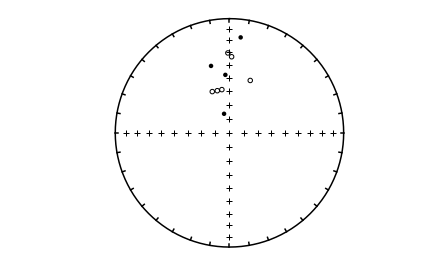

In [10]:
ipmag.plot_net(1) # make an equal angle net
ipmag.plot_di(data[0],data[1]) # put on the dots

### Problem 3: 
Use the dipole formula ($\tan (I) = 2 \tan (\lambda)$ where $I$ is inclination and $\lambda$ is latitude and calculate the GAD field at 36 $^{\circ}$N.  Note that declination is always zero for a GAD field.  We can make a **lambda** function for this!

In [11]:
lat = np.radians(36.) # remember to convert to radians!
inc = lambda lat: np.degrees(np.arctan(2.*np.tan(lat)))  # and back! 
print ('%7.1f'%(inc(lat))) # and print it out

   55.5


Let's use the pmag function **dia_vgp**.  First let's figure out what it does:

In [7]:
help(pmag.dia_vgp)

Help on function dia_vgp in module pmagpy.pmag:

dia_vgp(*args)
    Converts directional data (declination, inclination, alpha95) at a given
    location (Site latitude, Site longitude) to pole position (pole longitude,
    pole latitude, dp, dm)
    
    Parameters
    ----------
    Takes input as (Dec, Inc, a95, Site latitude, Site longitude)
    Input can be as individual values (5 parameters)
    or
    as a list of lists: [[Dec, Inc, a95, lat, lon],[Dec, Inc, a95, lat, lon]]
    
    Returns
    ----------
    if input is individual values for one pole the return is:
    pole longitude, pole latitude, dp, dm
    
    if input is list of lists the return is:
    list of pole longitudes, list of pole latitude, list of dp, list of dm



Now we can use it to convert our directions to VGPs. Note that alpha95 is require but is not given here so we supply a zero in its place. Note also that westward longitudes are indicated by minus signs

In [13]:
vgp_lat,vgp_lon,dp,dp= pmag.dia_vgp(345,47,0.,36,-112) 
print ('%7.1f %7.1f'%(vgp_lat,vgp_lon))

  130.6    75.1
